In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Datasets loads

In [29]:
Closed_deals = pd.read_csv('../Datasets/Datasets_original/olist_closed_deals_dataset.csv')
Customers = pd.read_csv('../Datasets/Datasets_original/olist_customers_dataset.csv')
Order_items = pd.read_csv('../Datasets/Datasets_original/olist_order_items_dataset.csv')
Order_reviews = pd.read_csv('../Datasets/Datasets_original/olist_order_reviews_dataset.csv')
Orders = pd.read_csv('../Datasets/Datasets_original/olist_orders_dataset.csv')
Products = pd.read_csv('../Datasets/Datasets_original/olist_products_dataset.csv')
Sellers = pd.read_csv('../Datasets/Datasets_original/olist_sellers_dataset.csv')

Visualizations

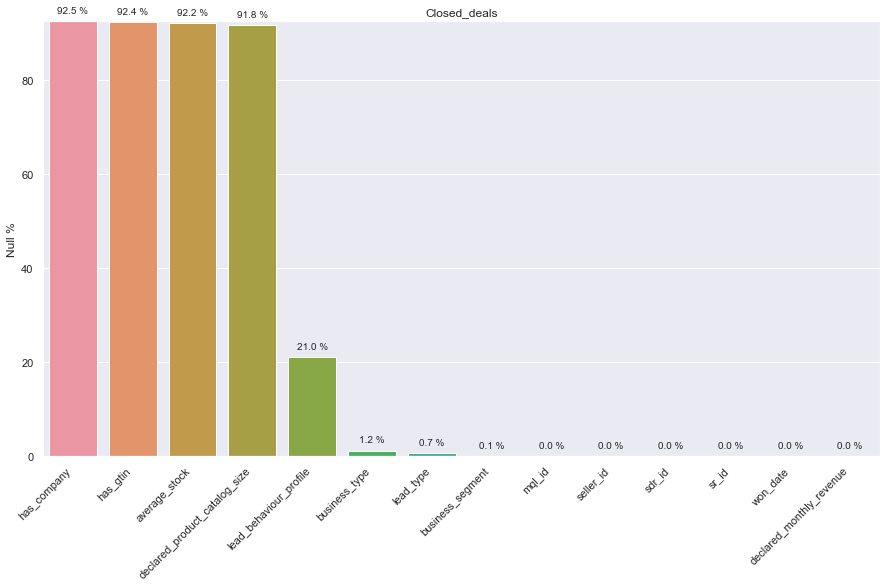

In [17]:
# Nulls by column
valores=Closed_deals.isna().sum().sort_values(ascending=False)*100/Closed_deals.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,8)})

# Data
ax = sns.barplot(x=valores.index, y=valores)

# Labels
ax.set_ylabel('Null %')
plt.title('Closed_deals')
plt.xticks(rotation=45,ha='right')

ax.set_ylim(top=valores.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

plt.show()

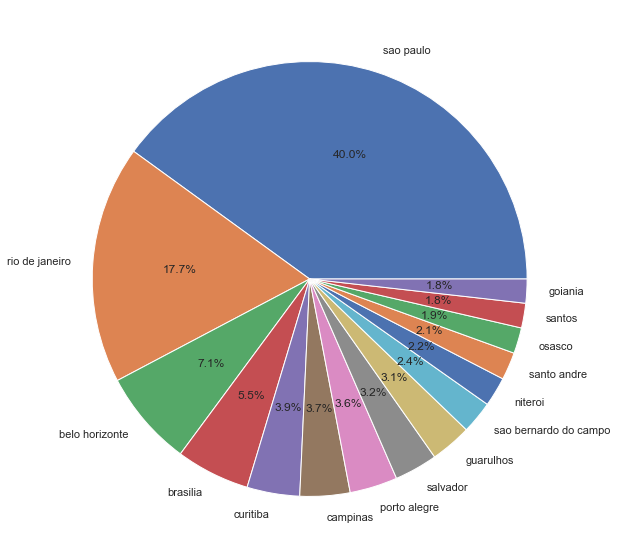

In [20]:
#15 Cities with more clients
val=Cantidad_por_ciudad=Customers.groupby(["customer_city"]).count().sort_values(by=["customer_id"],ascending=False).drop_duplicates("customer_id")["customer_id"].head(15)
plot = val.plot.pie(ylabel="",subplots=True, figsize=(20, 10),autopct='%1.1f%%')

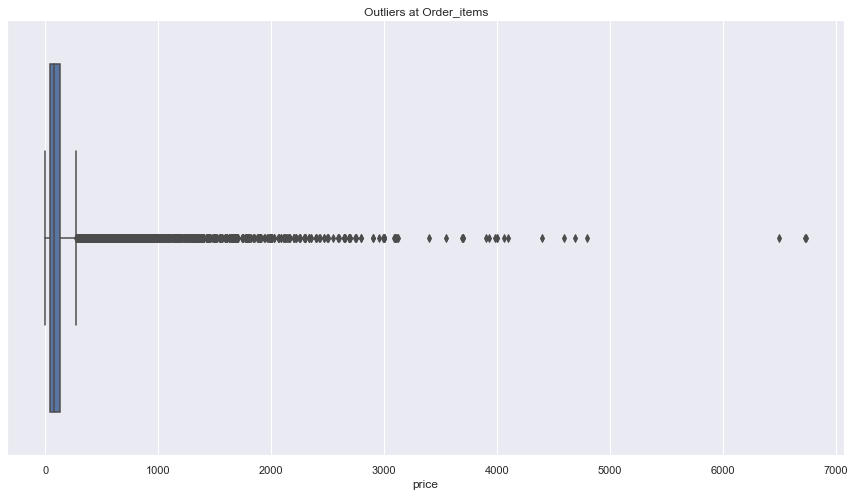

In [23]:
#Outlier detection
sns.boxplot(x=Order_items.price)
plt.title('Outliers at Order_items')
plt.show()

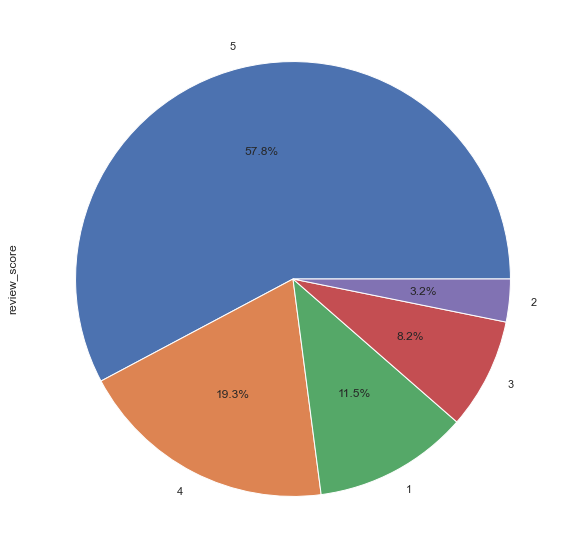

In [25]:
val=Order_reviews.review_score.value_counts()
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

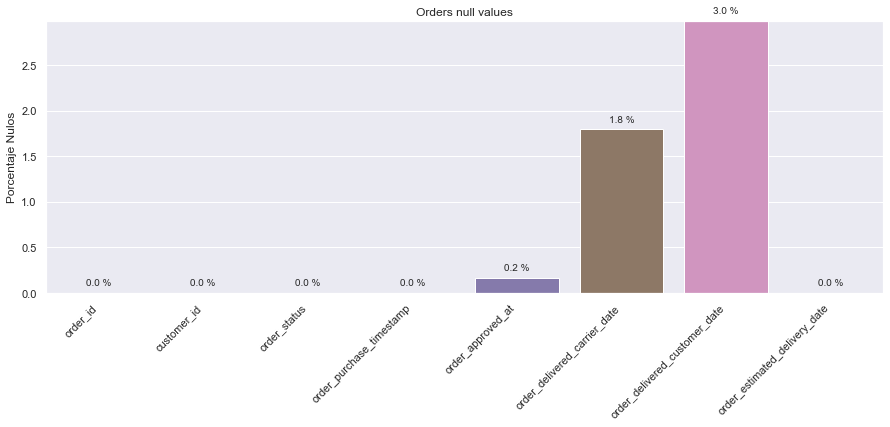

In [28]:
# % of null values
Values = Orders.isna().sum()*100/Orders.shape[0]

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5)})

# Data
ax = sns.barplot(x=Values.index, y=Values)

# Labels
ax.set_ylabel('% Null')
plt.xticks(rotation=45,ha='right')
plt.title('Orders null values')

ax.set_ylim(top=Values.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

plt.show()

In [ ]:
# % of null values
Values = Products.isna().sum()*100/Products.shape[0]
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

# Data
ax = sns.barplot(x=Values.index, y=Values)

# Labels
ax.set_ylabel('% Null')
plt.xticks(rotation=45,ha='right')
plt.title('Product null values')

ax.set_ylim(top=Values.max())

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=1))+" %", 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10
               )

plt.show()

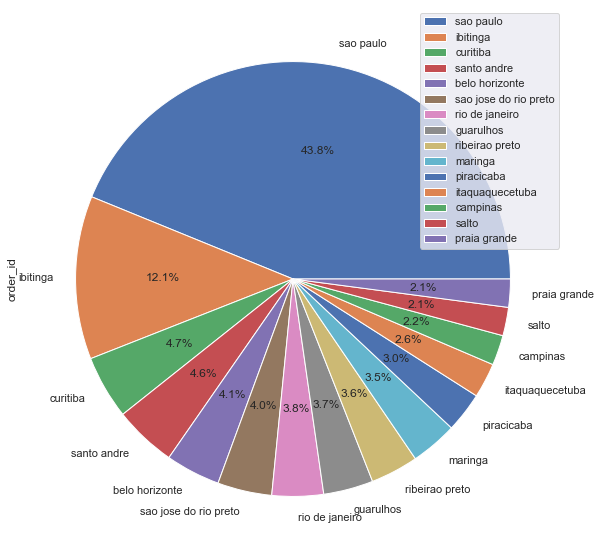

In [30]:
# Cities with most orders
val = Sellers.merge(Order_items)[['seller_city','order_id']].groupby(['seller_city']).count().sort_values('order_id', ascending=False).head(15)

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

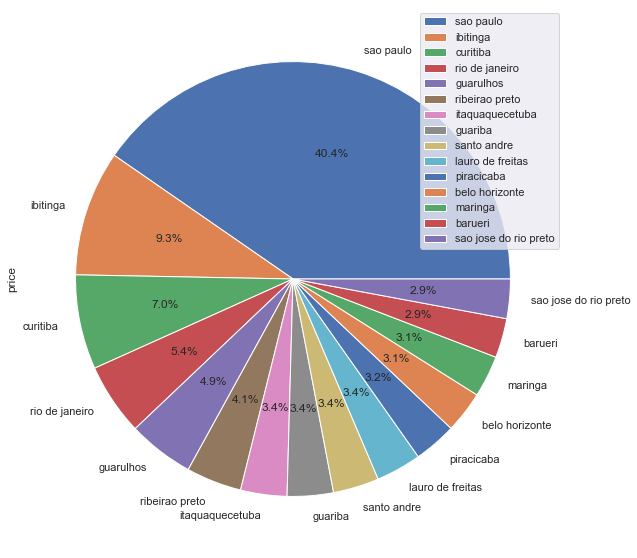

In [31]:
# Cities with more sales in $
val = Sellers.merge(Order_items)[['seller_city','price']].groupby(['seller_city']).sum().sort_values('price', ascending=False).head(15)
plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')

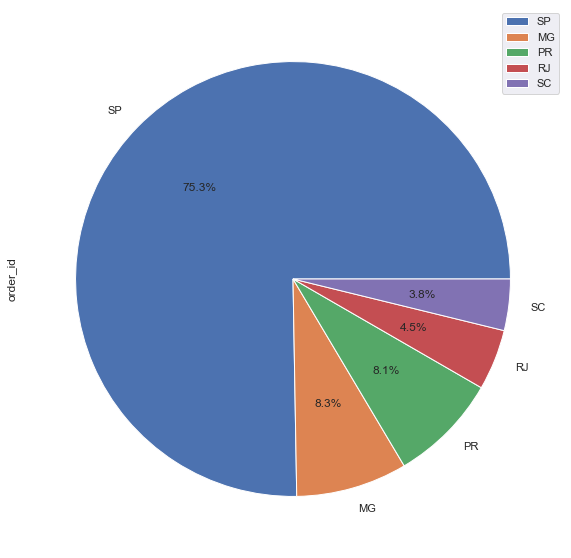

In [32]:
# Province with more orders
val = Sellers.merge(Order_items)[['seller_state','order_id']].groupby(['seller_state']).count().sort_values('order_id', ascending=False).head()

plot = val.plot.pie(subplots=True, figsize=(20, 10),autopct='%1.1f%%')